Подключаем Google Диск в Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive

Mounted at /content/drive/
/content/drive/MyDrive


# Лабораторная работа №1

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
import sklearn

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')

In [10]:
result = data.head(10)
print ("First 10 row:")
print (result)

First 10 row:
                    Country              City  AQI Value  \
0        Russian Federation        Praskoveya         51   
1                    Brazil  Presidente Dutra         41   
2                     Italy   Priolo Gargallo         66   
3                    Poland         Przasnysz         34   
4                    France          Punaauia         22   
5  United States of America       Punta Gorda         54   
6                   Germany        Puttlingen         62   
7                   Belgium             Puurs         64   
8        Russian Federation        Pyatigorsk         54   
9                     Egypt            Qalyub        142   

                     AQI Category  CO AQI Value CO AQI Category  \
0                        Moderate             1            Good   
1                            Good             1            Good   
2                        Moderate             1            Good   
3                            Good             1          

In [12]:
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')
print ("Base info:")
data.info()

Base info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [13]:
print ("Type info:")
print (data.dtypes)

Type info:
Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object


In [14]:
print ("Len info:")
print (data.shape)

Len info:
(23463, 12)


In [16]:
print ("Colums info:")
print (data.columns.values)

Colums info:
['Country' 'City' 'AQI Value' 'AQI Category' 'CO AQI Value'
 'CO AQI Category' 'Ozone AQI Value' 'Ozone AQI Category' 'NO2 AQI Value'
 'NO2 AQI Category' 'PM2.5 AQI Value' 'PM2.5 AQI Category']


In [18]:
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')
missing_value_count = data.isna().sum()
print ("Missing value count:")
print (missing_value_count)

Missing value count:
Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [19]:
print ("Duplicated value count:")
print (data.duplicated())

Duplicated value count:
0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Length: 23463, dtype: bool


In [20]:
new_data = data.drop_duplicates()

In [22]:
print ("After drop duplicates:")
print (new_data.duplicated())

After drop duplicates:
0        False
1        False
2        False
3        False
4        False
         ...  
23458    False
23459    False
23460    False
23461    False
23462    False
Length: 23463, dtype: bool


В датасете доминирует тип данных object

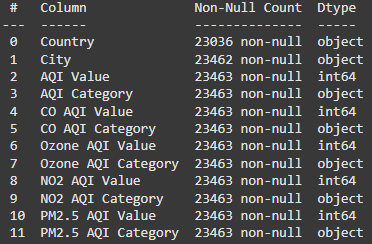

Пропущенные значения:

- Country 427
- City 1

# Предобработка и визуализация данных

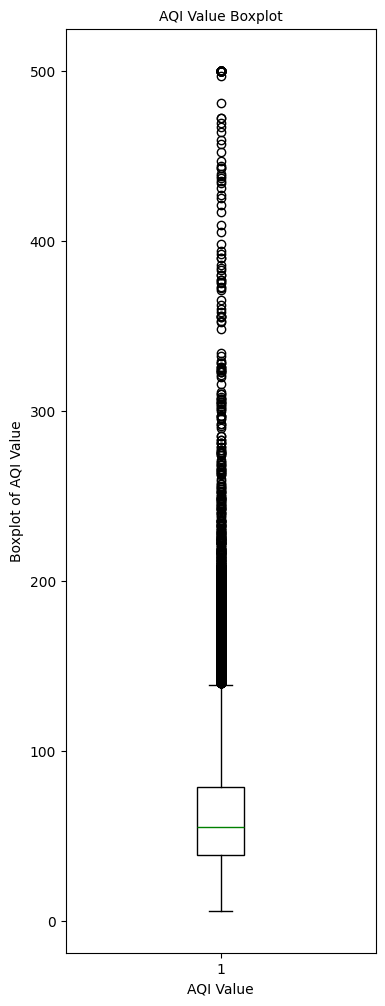

In [69]:
data['AQI Value'] = pd.to_numeric(data['AQI Value'], errors='coerce')
plt.figure(figsize=(4, 12))
plt.boxplot(data['AQI Value'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='white'), whiskerprops=dict(color='black'), medianprops=dict(color='green'))
plt.title('AQI Value Boxplot', fontsize=10)
plt.xlabel('AQI Value', fontsize=10)
plt.ylabel('Boxplot of AQI Value', fontsize=10)
plt.show()

Наблюдаются аномалии. Много выбросов за пределами.

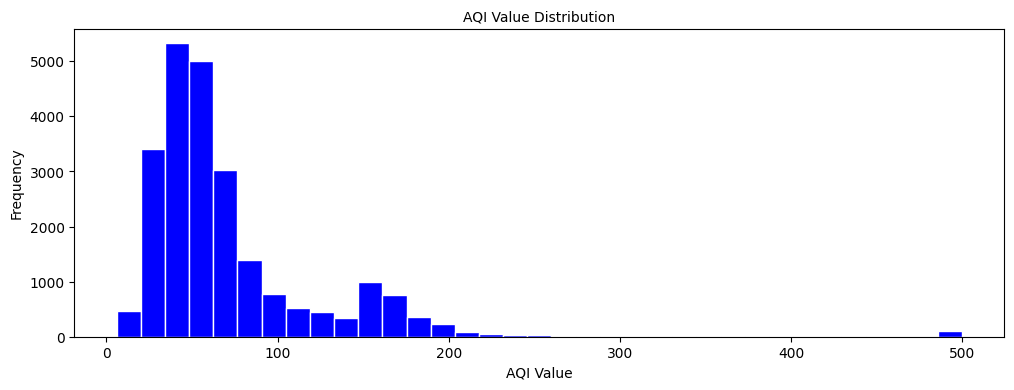

In [56]:
data['AQI Value'] = pd.to_numeric(data['AQI Value'], errors='coerce')
plt.figure(figsize=(12, 4))
plt.hist(data['AQI Value'].dropna(), bins = 35, color='blue', edgecolor='white')
plt.title('AQI Value Distribution', fontsize=10)
plt.xlabel('AQI Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [57]:
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')
data_number = data.select_dtypes(np.number)
data_number.head

<bound method NDFrame.head of        AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0             51             1               36              0   
1             41             1                5              1   
2             66             1               39              2   
3             34             1               34              0   
4             22             0               22              0   
...          ...           ...              ...            ...   
23458        184             3              154              2   
23459         50             1               20              5   
23460         50             1               22              1   
23461         71             1               44              2   
23462         70             1               38              0   

       PM2.5 AQI Value  
0                   51  
1                   41  
2                   66  
3                   20  
4                    6  
...                ...  
23458              184  
23459               50  
23460               50  
23461               71  
23462               70  

[23463 rows x 5 columns]>

In [58]:
data_log = data_number.apply(lambda x : np.log(x+1))
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')
data_number = data.select_dtypes(include = [np.number])
data_log = data_number.apply(lambda x : np.log(x+1))
print (data_log)

       AQI Value  CO AQI Value  Ozone AQI Value  NO2 AQI Value  \
0       3.951244      0.693147         3.610918       0.000000   
1       3.737670      0.693147         1.791759       0.693147   
2       4.204693      0.693147         3.688879       1.098612   
3       3.555348      0.693147         3.555348       0.000000   
4       3.135494      0.000000         3.135494       0.000000   
...          ...           ...              ...            ...   
23458   5.220356      1.386294         5.043425       1.098612   
23459   3.931826      0.693147         3.044522       1.791759   
23460   3.931826      0.693147         3.135494       0.693147   
23461   4.276666      0.693147         3.806662       1.098612   
23462   4.262680      0.693147         3.663562       0.000000   

       PM2.5 AQI Value  
0             3.951244  
1             3.737670  
2             4.204693  
3             3.044522  
4             1.945910  
...                ...  
23458         5.220356  
23459  

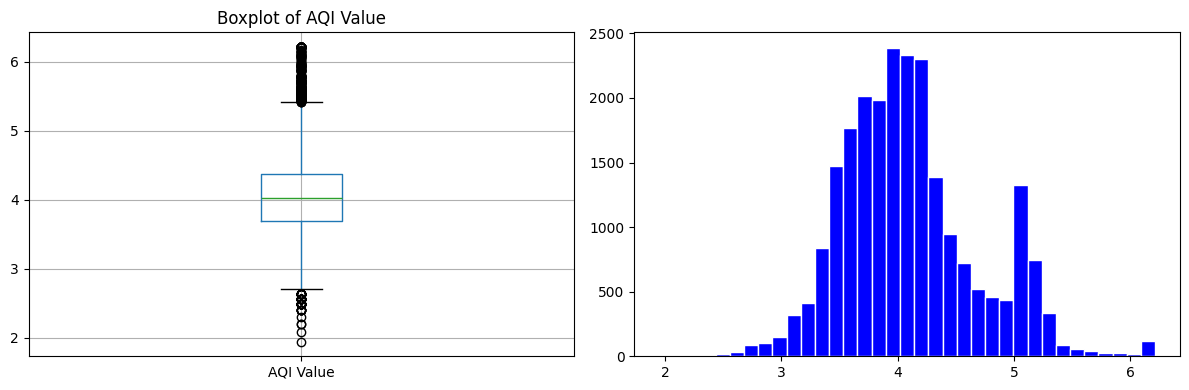

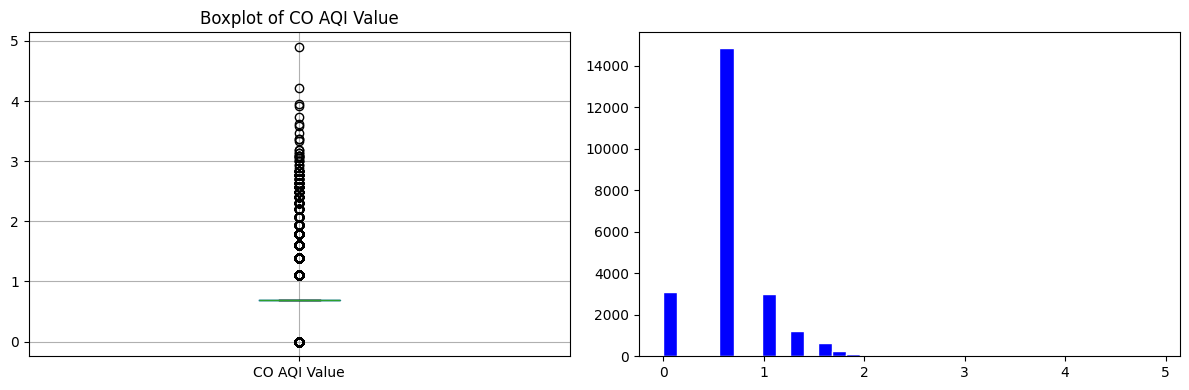

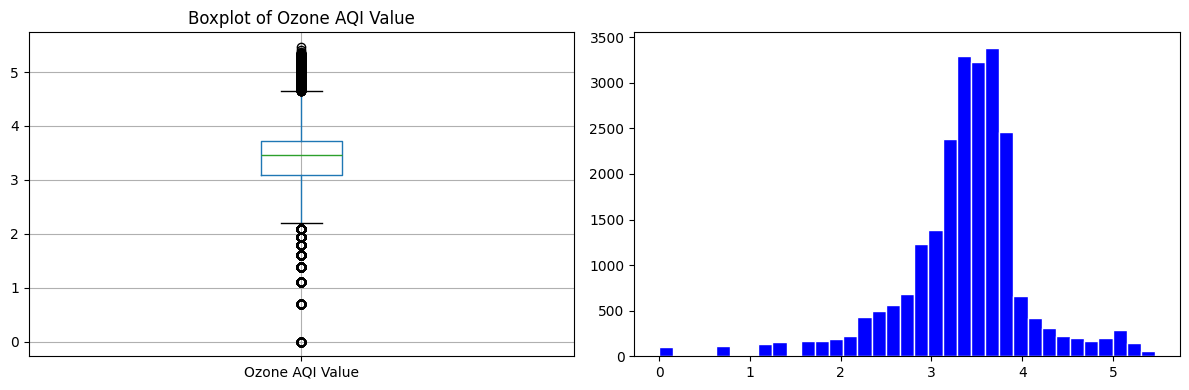

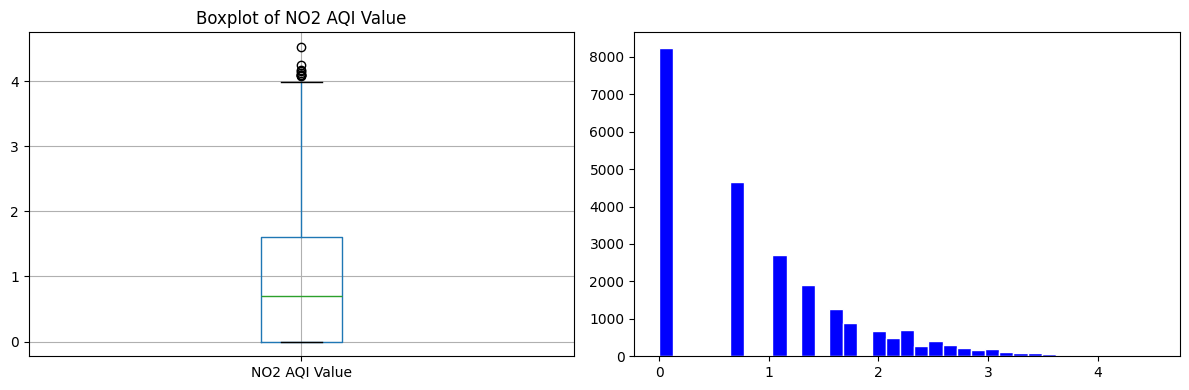

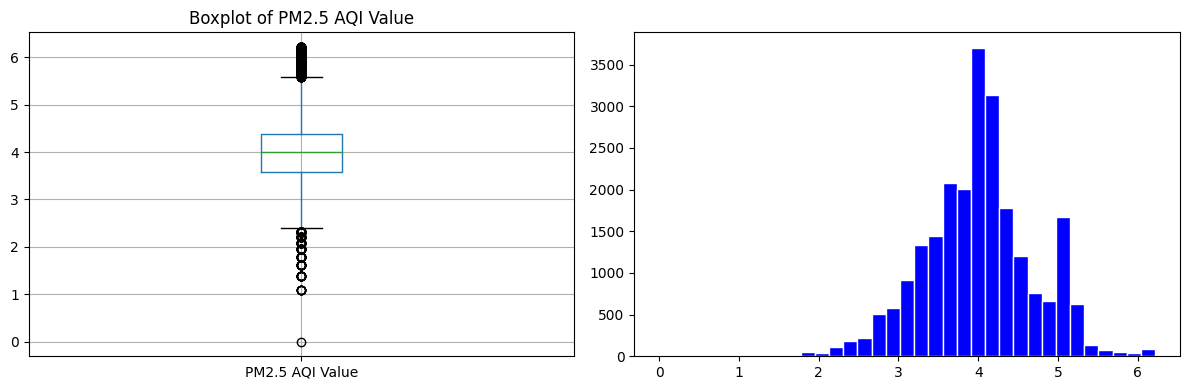

In [70]:
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')
data_number = data.select_dtypes(include = [np.number])
data_log = data_number.apply(lambda x : np.log(x+1))
for values in data_log.columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    data_log.boxplot(column=values)
    plt.title(f'Boxplot of {values}')
    plt.subplot(1, 2, 2)
    plt.hist(data_log[values].dropna(), bins=35, color='blue', edgecolor='white')
    plt.tight_layout()
    plt.show()

# Лабораторная работа №2

In [71]:
data = pd.read_csv('/content/drive/MyDrive/Airpollution.csv')
data = data.drop('City', axis=1)

In [72]:
y = data[['AQI Value']]

In [73]:
X = data.drop('AQI Value', axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_traint_scaled = scaler.fit_transform(X_train.select_dtypes(exclude=['object']))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude=['object']))
df_X_traint_scaled= pd.DataFrame(X_traint_scaled)
df_X_test_scaled= pd.DataFrame(X_test_scaled)
display(df_X_traint_scaled)
display(df_X_test_scaled)

,0,1,2,3
0,-0.191954,-0.328512,-0.012089,-0.153438
1,2.454408,3.026061,2.668565,1.802274
2,-0.191954,-0.257138,-0.395040,-0.135161
3,-0.191954,0.135419,-0.395040,-0.921101
4,-0.191954,-0.007329,-0.203564,0.193838
...,...,...,...,...
17592,-0.191954,0.171105,-0.586515,-0.720046
17593,0.866591,2.883313,-0.395040,0.632502
17594,-0.191954,-0.257138,-0.203564,0.815279
17595,-0.191954,0.492288,-0.586515,-0.299660


,0,1,2,3
0,-0.191954,0.064045,-0.586515,-0.189994
1,-0.191954,-0.542633,-0.586515,-0.683491
2,0.337318,-0.828129,-0.586515,0.047616
3,-0.721227,-0.257138,-0.395040,-0.793157
4,-0.721227,-0.078703,-0.203564,-1.049045
...,...,...,...,...
5861,-0.721227,-0.078703,-0.395040,-0.957656
5862,-0.721227,-0.435573,-0.395040,-0.793157
5863,-0.191954,0.099732,-0.395040,-0.445881
5864,0.337318,-0.756755,-0.395040,-0.189994


In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(X_train.select_dtypes(exclude=['object']))
X_train_object = enc.transform(X_train.select_dtypes(exclude=['object']))
X_test_object = enc.transform(X_test.select_dtypes(exclude=['object']))
X_traint_OHE = pd.DataFrame(X_train_object, columns=enc.get_feature_names_out())
X_test_OHE = pd.DataFrame(X_test_object, columns=enc.get_feature_names_out())
display(X_traint_OHE)
display(X_test_OHE)

,CO AQI Value_0,CO AQI Value_1,CO AQI Value_2,CO AQI Value_3,CO AQI Value_4,CO AQI Value_5,CO AQI Value_6,CO AQI Value_7,CO AQI Value_8,CO AQI Value_9,...,PM2.5 AQI Value_474,PM2.5 AQI Value_476,PM2.5 AQI Value_477,PM2.5 AQI Value_478,PM2.5 AQI Value_480,PM2.5 AQI Value_481,PM2.5 AQI Value_487,PM2.5 AQI Value_492,PM2.5 AQI Value_493,PM2.5 AQI Value_500
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17593,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17594,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,CO AQI Value_0,CO AQI Value_1,CO AQI Value_2,CO AQI Value_3,CO AQI Value_4,CO AQI Value_5,CO AQI Value_6,CO AQI Value_7,CO AQI Value_8,CO AQI Value_9,...,PM2.5 AQI Value_474,PM2.5 AQI Value_476,PM2.5 AQI Value_477,PM2.5 AQI Value_478,PM2.5 AQI Value_480,PM2.5 AQI Value_481,PM2.5 AQI Value_487,PM2.5 AQI Value_492,PM2.5 AQI Value_493,PM2.5 AQI Value_500
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5862,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5863,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5864,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X_traint_final = pd.DataFrame(pd.concat([df_X_traint_scaled, X_traint_OHE], axis=1))
X_test_final = pd.DataFrame(pd.concat([df_X_test_scaled, X_test_OHE], axis=1))
display(X_traint_final)
display(X_test_final)

,0,1,2,3,CO AQI Value_0,CO AQI Value_1,CO AQI Value_2,CO AQI Value_3,CO AQI Value_4,CO AQI Value_5,...,PM2.5 AQI Value_474,PM2.5 AQI Value_476,PM2.5 AQI Value_477,PM2.5 AQI Value_478,PM2.5 AQI Value_480,PM2.5 AQI Value_481,PM2.5 AQI Value_487,PM2.5 AQI Value_492,PM2.5 AQI Value_493,PM2.5 AQI Value_500
0,-0.191954,-0.328512,-0.012089,-0.153438,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.454408,3.026061,2.668565,1.802274,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.191954,-0.257138,-0.395040,-0.135161,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.191954,0.135419,-0.395040,-0.921101,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.191954,-0.007329,-0.203564,0.193838,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17592,-0.191954,0.171105,-0.586515,-0.720046,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17593,0.866591,2.883313,-0.395040,0.632502,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17594,-0.191954,-0.257138,-0.203564,0.815279,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17595,-0.191954,0.492288,-0.586515,-0.299660,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,0,1,2,3,CO AQI Value_0,CO AQI Value_1,CO AQI Value_2,CO AQI Value_3,CO AQI Value_4,CO AQI Value_5,...,PM2.5 AQI Value_474,PM2.5 AQI Value_476,PM2.5 AQI Value_477,PM2.5 AQI Value_478,PM2.5 AQI Value_480,PM2.5 AQI Value_481,PM2.5 AQI Value_487,PM2.5 AQI Value_492,PM2.5 AQI Value_493,PM2.5 AQI Value_500
0,-0.191954,0.064045,-0.586515,-0.189994,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.191954,-0.542633,-0.586515,-0.683491,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.337318,-0.828129,-0.586515,0.047616,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.721227,-0.257138,-0.395040,-0.793157,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.721227,-0.078703,-0.203564,-1.049045,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5861,-0.721227,-0.078703,-0.395040,-0.957656,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5862,-0.721227,-0.435573,-0.395040,-0.793157,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5863,-0.191954,0.099732,-0.395040,-0.445881,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5864,0.337318,-0.756755,-0.395040,-0.189994,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


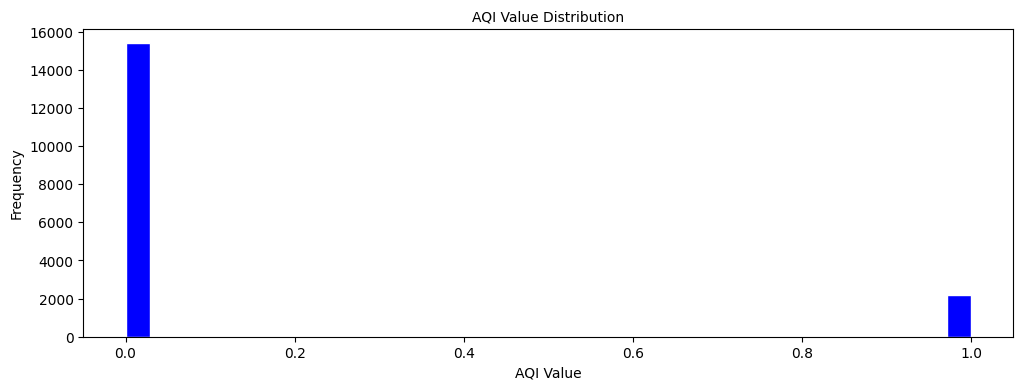

In [96]:
plt.figure(figsize=(12, 4))
plt.hist(X_traint_final['CO AQI Value_2'].dropna(), bins = 35, color='blue', edgecolor='white')
plt.title('AQI Value Distribution', fontsize=10)
plt.xlabel('AQI Value', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.show()

Данные пришли к одному числовому стандарту, данные object = 0